# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [3]:
!pip install palmerpenguins

In [4]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
penguins = pd.concat([penguins, pd.get_dummies(penguins['sex'], drop_first=True, prefix='sex')], axis=1)
penguins = penguins.drop('sex', axis=1)
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007,0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007,0


In [6]:
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007,1


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
from plotnine import *

In [31]:
# Simple linear regression:
X = penguins['bill_length_mm'].values.reshape(-1, 1)
y = penguins['bill_depth_mm'].values
lin_reg = LinearRegression().fit(X, y)
y_pred_lin = lin_reg.predict(X)


In [32]:
# Quadratic Model
quad_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])
quad_pipeline.fit(X, y)
y_pred_quad = quad_pipeline.predict(X)

In [33]:
# Cubic Model
cubic_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('lin_reg', LinearRegression())
])
cubic_pipeline.fit(X, y)
y_pred_cubic = cubic_pipeline.predict(X)

In [34]:
# Degree 10 Polynomial Model
deg10_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
deg10_pipeline.fit(X, y)
y_pred_deg10 = deg10_pipeline.predict(X)

In [35]:
# Prepare dataframe for plotting
df = pd.DataFrame({
    'X': X.ravel(),
    'y': y,
    'Linear': y_pred_lin,
    'Quadratic': y_pred_quad,
    'Cubic': y_pred_cubic,
    'Degree_10': y_pred_deg10})

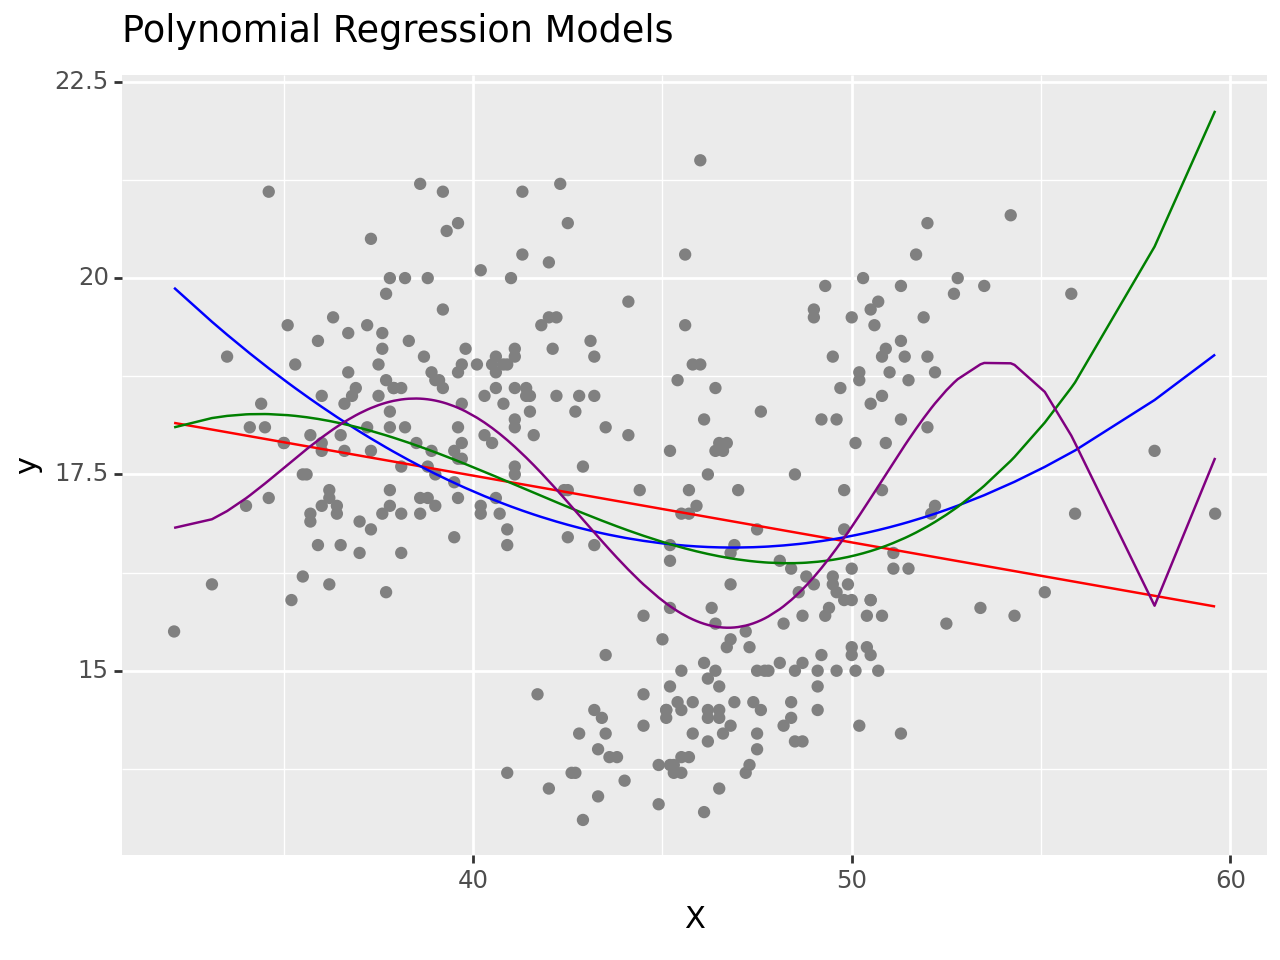

<Figure Size: (640 x 480)>

In [44]:
plot = (
    ggplot(df)
    + geom_point(aes(x='X', y='y'), color='gray')
    + geom_line(aes(x='X', y='Linear'), color='red')
    + geom_line(aes(x='X', y='Quadratic'), color='blue')
    + geom_line(aes(x='X', y='Cubic'), color='green')
    + geom_line(aes(x='X', y='Degree_10'), color='purple')
    + ggtitle('Polynomial Regression Models')
)
plot


* Are any of the models above underfitting the data? If so, which ones and how can you tell?

It looks as through the simple linear regression model (red) is underfitting the data, as the line doesn't closely follow most of the data points.

* Are any of the models above overfitting the data? If so, which ones and how can you tell?

The 10 degree polynomial model (purple) seems to be overfitting the data, as it looks to be fitting the randomness of the dataset too well and doesn't fit the underlying pattern.


* Which of the above models do you think fits the data best and why?

I would say that perhaps the cubic model (green) fits the best, it seems to capture the trend of the data somewhat well, at least compared to the others